In [1]:
print('hi')

hi


## Question 1 of 4
### Basic Questions for class (2): Logistic Regression


Setting this up as a logistic regression
y
=
σ
(
β
1
x
+
β
0
)
y=σ(β 
1
​
 x+β 
0
​
 )﻿  (where ﻿
σ
(
x
)
=
e
x
1
+
e
x
σ(x)= 
1+e 
x
 
e 
x
 
​
 ﻿ ) problem:

What is the meaning of the input variable x here?
What are the two parameters here? Why are they (and not the x values) parameters?
What is the meaning of the output variable y here?

x represents the input feature or independent variable used to predict the outcome. It's the observed data you have for each instance.

The two parameters are β0​ (the intercept) and β1 (the coefficient for x):
β0​: This is the intercept. It represents the odds of the outcome when x=0.
β1​: This is the weight or coefficient for the input variable x. It measures the change in the odds of the outcome for a one-unit change in x.
They are parameters because they are the values the model learns from the data to best fit the relationship between x and y. The x values are not parameters; they are the input data you provide to the model.

y is the output or dependent variable that the model aims to predict. In logistic regression, y is usually binary (0 or 1), representing the two possible classes or outcomes.

# Question 2 of 4: Likelihood

Remember the \( y \) value we get from logistic regression really is a conditional probability. Specifically, it is

$$
P(\text{True} \mid x) = \sigma(\beta_1 x + \beta_0)
$$

From this, we can also deduce:

$$
P(\text{False} \mid x) = 1 - \sigma(\beta_1 x + \beta_0)
$$

Time for an analogy:

If a coin has a probability \( p \) of landing heads up (and so, \( 1 - p \) of landing tails up), and you observe heads, tails, heads, heads, tails, the likelihood is:

$$
L(p) = p \cdot (1 - p) \cdot p \cdot p \cdot (1 - p)
$$

And so the log likelihood is:

$$
\ln L(p) = \ln(p) + \ln(1 - p) + \ln(p) + \ln(p) + \ln(1 - p)
$$

**Question:** Fill in both expressions.

By analogy...the likelihood for our 100,000 observations \( x_1, \dots, x_{100,000} \) is:



$$
L(\beta_0, \beta_1) = \prod_{i=1}^{100,000} \left[ \sigma(\beta_1 x_i + \beta_0) \right]^{y_i} \left[ 1 - \sigma(\beta_1 x_i + \beta_0) \right]^{1 - y_i}
$$

and so our log likelihood is:

$$
\ln L(\beta_0, \beta_1) = \sum_{i=1}^{100,000} \left[ y_i \ln \sigma(\beta_1 x_i + \beta_0) + (1 - y_i) \ln \left( 1 - \sigma(\beta_1 x_i + \beta_0) \right) \right]
$$


## Core Question (3): Likelihood Calculation

Here's some code that "generates" some data, based on the probability distribution assumed by the logistic regression model. Specifically, the true values are β 0 ​ =−5,β 1 ​ =3 (but pretend you don't know that)

In [8]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

NUM_DATAPOINTS = 1000

def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

def generate_data(x):
    a = 3  #beta_1
    b = -5  #beta_0
    prob = sigmoid(a*x+b)
    return np.random.uniform() < prob

x_data = np.random.uniform(high=3, size=NUM_DATAPOINTS)
y_data = [generate_data(x) for x in x_data]

Note that this simulation produces a dataset where, we go from a low probability of success, to a high probability of success at about ~1200 hours, but also a fair amount of variance around that mark:

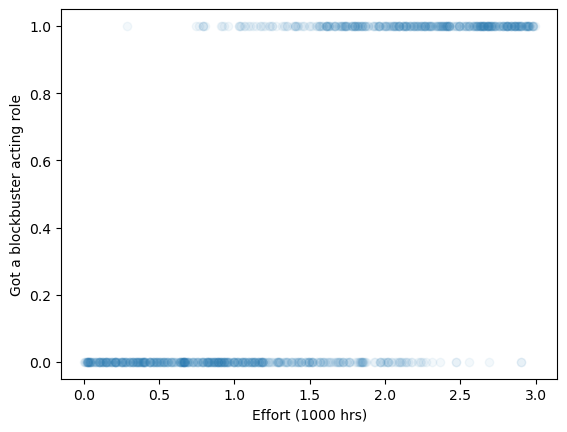

In [9]:
plt.scatter(x_data, y_data, alpha=0.05)
plt.xlabel("Effort (1000 hrs)")
plt.ylabel("Got a blockbuster acting role")
plt.show()

Now, suppose your friend Aishwarya (who doesn't know the real values of ) claims the values that best "fit" this data are  . TA Irhum claims "well, actually..." the values are  . Both are wrong, but who is more wrong? 

Computing the log-likelihood helps us answer this question: higher is better! Fill out the function below, and comment: which estimate is better?

In [15]:
# Fix this function
# You might wish to use the sigmoid(x) function defined above!
def log_likelihood_per_point(beta_0, beta_1, x, y):
    prob = sigmoid(beta_0 + beta_1 * x)
    if y is True:
        return np.log(prob)
    else:
        return np.log(1 - prob)



# This one's complete!
def total_log_likelihood(beta_0, beta_1, xs, ys):
    total_ll = 0

    for (x, y) in zip(xs, ys):
        total_ll += log_likelihood_per_point(beta_0, beta_1, x, y)
    
    return total_ll

# Be careful, which is the *higher* value when two values are negative?
print("Aishwarya's estimate: ", total_log_likelihood( 3, -3, x_data, y_data))
print("TA Irhum's estimate: ", total_log_likelihood( 4, -1, x_data, y_data))

Aishwarya's estimate:  -722.614375051468
TA Irhum's estimate:  -2643.5425603316207


Aishwarya's estimate has a higher (less negative) log-likelihood than TA Irhum. Therefore, Aishwarya is less wrong, and her estimate better fits the data.

In [19]:
pip install jax

  Using cached jax-0.4.33-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.33-cp312-cp312-macosx_11_0_arm64.whl.metadata (983 bytes)
  Using cached ml_dtypes-0.5.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (21 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
Using cached jax-0.4.33-py3-none-any.whl (2.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 17.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
import jax.numpy as jnp
from jax import grad
import numpy as np

# Sigmoid function using JAX
def sigmoid(x):
    return jnp.exp(x) / (1 + jnp.exp(x))

# Convert y_data from True/False to 0/1
y_data = np.array([int(y) for y in y_data])

# Function to compute the total log likelihood in JAX
def log_likelihood(beta_0, beta_1, x_data, y_data):
    linear_term = beta_1 * x_data + beta_0
    probs = sigmoid(linear_term)
    
    # Log likelihood: for y = 1, it's log(prob), for y = 0, it's log(1 - prob)
    return jnp.sum(y_data * jnp.log(probs) + (1 - y_data) * jnp.log(1 - probs))

# Compute gradient of the log likelihood w.r.t. beta_0 and beta_1
log_likelihood_grad = grad(log_likelihood, argnums=(0, 1))

# Aishwarya's initial estimate (for example, let's use these values)
initial_beta_0 = 3.0
initial_beta_1 = -3.0

# Compute the gradients at Aishwarya's initial estimate
grad_beta_0, grad_beta_1 = log_likelihood_grad(initial_beta_0, initial_beta_1, x_data, y_data)

# Print the computed gradients
print(f"Gradient w.r.t. beta_0: {grad_beta_0}")
print(f"Gradient w.r.t. beta_1: {grad_beta_1}")


Gradient w.r.t. beta_0: 74.47683715820312
Gradient w.r.t. beta_1: 699.877197265625


### Question 3 of 4
## #MLDevelopment
Link your study Notion here and briefly describe the students you worked with and which materials you found particularly useful. 

https://www.notion.so/b96dd2ab4cd245748285211b477ebbb3?v=d31b2c53bf9a413583a1d286eeb94b0b&pvs=4

I have worked with Hayoung to make this study Notion. 
https://rpsychologist.com/likelihood/ 
This visualization of MLE calculation helped me have a deeper intuition about the whole process.